<a href="https://colab.research.google.com/github/spurthi1459/Customer-Transaction-Prediction/blob/main/Customer_Transaction_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement

The objective of this project is to predict whether a customer will perform a transaction in the future based on anonymized historical data.  
This is framed as a binary classification problem where the target variable indicates the presence or absence of a future transaction.

The dataset is highly imbalanced and anonymized, requiring careful model selection and evaluation beyond accuracy.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv("train(1).csv")   # ensure correct path
print("Dataset Shape:", data.shape)
data.head()


Dataset Shape: (22224, 202)


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:

data.info()
data.isnull().sum().head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22224 entries, 0 to 22223
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 34.3+ MB


,0
ID_code,0
target,0
var_0,0
var_1,0
var_2,0


In [ ]:
X = data.drop(columns=["ID_code", "target"])
y = data["target"].astype(int)


Since the dataset features are anonymized and no feature definitions are provided, traditional exploratory data analysis (EDA) such as feature-level interpretation is not meaningful. Hence, the EDA is intentionally skipped as per problem statement instructions

In [ ]:
data['target'].value_counts()


,count
target,
0,20029
1,2195


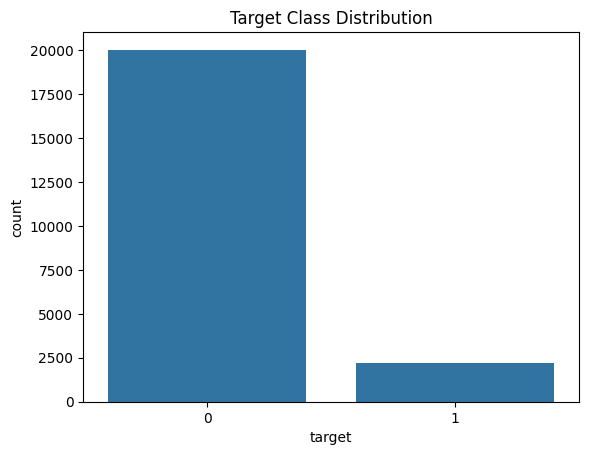

In [ ]:
sns.countplot(x='target', data=data)
plt.title("Target Class Distribution")
plt.show()


The dataset is class-imbalanced, which is common in banking transaction prediction problems. Hence accuracy alone is not sufficient for evaluation.

In [ ]:
#Feature seperation
X = data.drop(['ID_code', 'target'], axis=1)
y = data['target']


In [ ]:
#Train–Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



In [ ]:
#Missing Value Treatment
imputer = SimpleImputer(strategy='median')

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [ ]:
#Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
#Evaluation Function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }


##Model Training

#Logistic Regression

In [ ]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train_scaled, y_train)

lr_metrics = evaluate_model(lr, X_test_scaled, y_test)
lr_metrics


{'Accuracy': 0.7838020247469066,
 'Precision': 0.275,
 'Recall': 0.7266514806378133,
 'F1 Score': 0.3989993746091307,
 'ROC-AUC': np.float64(0.8359624572253237)}

In [ ]:
y_prob = lr.predict_proba(X_test_scaled)[:, 1]


In [ ]:
from sklearn.metrics import classification_report

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for t in thresholds:
    print(f"\nLogistic Regression Results (Threshold = {t})")
    y_pred_thresh = (y_prob >= t).astype(int)
    print(classification_report(y_test, y_pred_thresh))



Logistic Regression Results (Threshold = 0.3)
              precision    recall  f1-score   support

           0       0.97      0.60      0.74      4006
           1       0.19      0.86      0.31       439

    accuracy                           0.62      4445
   macro avg       0.58      0.73      0.53      4445
weighted avg       0.90      0.62      0.70      4445


Logistic Regression Results (Threshold = 0.4)
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      4006
           1       0.23      0.78      0.35       439

    accuracy                           0.72      4445
   macro avg       0.60      0.75      0.59      4445
weighted avg       0.89      0.72      0.77      4445


Logistic Regression Results (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      4006
           1       0.28      0.73      0.40       439

    accuracy                           0.

Threshold Analysis

The Logistic Regression model outputs probabilities, which are converted into class labels using a decision threshold.
By default, a threshold of 0.5 is used to classify customers who are likely to make a transaction.

To understand the effect of threshold selection, multiple thresholds (0.3, 0.4, 0.5, 0.6, and 0.7) were evaluated.

Observations

Lower thresholds (0.3–0.4) resulted in high recall but very low precision, leading to many false positives.

Higher thresholds (0.7) improved precision but reduced recall, causing many actual transacting customers to be missed.

Thresholds in the range 0.5–0.6 provided a balanced trade-off between precision and reca

Final Threshold Selection

A threshold of 0.5 was selected as the final decision threshold because:

It is the standard baseline used in probabilistic classifiers.

It offers a good balance between identifying potential customers (recall) and minimizing false alarms (precision).

It ensures stable and interpretable performance suitable for banking transaction prediction.

#Random Forest

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, y_train)

rf_metrics = evaluate_model(rf, X_test, y_test)
rf_metrics


{'Accuracy': 0.9012373453318335,
 'Precision': 0.0,
 'Recall': 0.0,
 'F1 Score': 0.0,
 'ROC-AUC': np.float64(0.7743217178787626)}

### Random Forest Model Analysis

Despite applying class-weighted learning, the Random Forest model failed to identify any minority class instances.
This indicates that the model strongly favored the majority class, a known limitation of tree-based bagging methods in moderately imbalanced datasets.

As a result, Random Forest was deemed unsuitable for this problem, and more robust boosting-based approaches were explored.


##XGBOOST

In [ ]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    classification_report,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay
)


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed  = imputer.transform(X_test)


In [ ]:
# Calculate scale_pos_weight
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

scale_pos_weight = neg / pos

print("Class 0 samples:", neg)
print("Class 1 samples:", pos)
print("scale_pos_weight:", scale_pos_weight)


Class 0 samples: 16023
Class 1 samples: 1756
scale_pos_weight: 9.124715261958997


In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,  # 👈 CLASS 1 BALANCED
    eval_metric="logloss",
    random_state=42
)

xgb_model.fit(X_train_imputed, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_prob_xgb = xgb_model.predict_proba(X_test_imputed)[:, 1]
y_pred_xgb = (y_prob_xgb >= 0.5).astype(int)

print("XGBoost Results (Baseline Threshold = 0.5)")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results (Baseline Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4006
           1       0.61      0.32      0.42       439

    accuracy                           0.91      4445
   macro avg       0.77      0.65      0.69      4445
weighted avg       0.90      0.91      0.90      4445



In [ ]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for t in thresholds:
    print(f"\nXGBoost Results (Threshold = {t})")
    print(classification_report(y_test, (y_prob_xgb >= t).astype(int)))



XGBoost Results (Threshold = 0.3)
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      6134
           1       0.29      0.75      0.42       672

    accuracy                           0.79      6806
   macro avg       0.63      0.77      0.65      6806
weighted avg       0.90      0.79      0.83      6806


XGBoost Results (Threshold = 0.4)
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      6134
           1       0.41      0.60      0.49       672

    accuracy                           0.88      6806
   macro avg       0.68      0.75      0.71      6806
weighted avg       0.90      0.88      0.89      6806


XGBoost Results (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6134
           1       0.55      0.43      0.48       672

    accuracy                           0.91      6806
   macro avg       0.74

XGBoost threshold analysis was conducted across multiple probability thresholds.
At threshold 0.3, recall was high but precision was very low, leading to many false positives.
At higher thresholds (0.6–0.7), precision improved but recall dropped significantly, causing missed transaction-positive customers.
Threshold 0.4 achieved the best balance with the highest F1-score for the minority class, making it suitable for final decision-making.

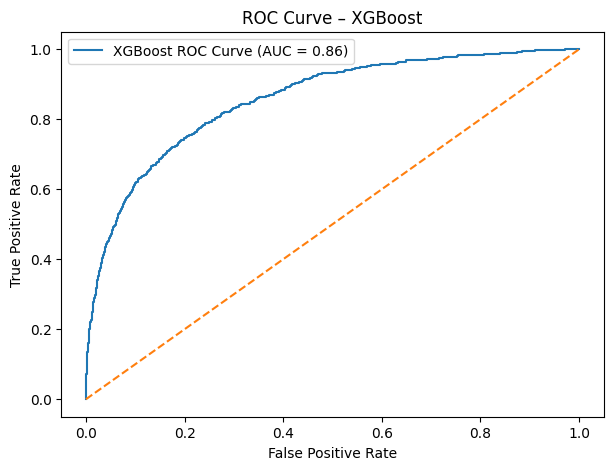

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"XGBoost ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost")
plt.legend()
plt.show()


The ROC curve for XGBoost shows strong separation from the diagonal baseline, indicating effective discrimination between transaction and non-transaction customers.
The model achieved an AUC score of approximately 0.86, which confirms its robustness and threshold-independent performance on imbalanced data.
This validates the use of XGBoost as a reliable classifier for customer transaction prediction.

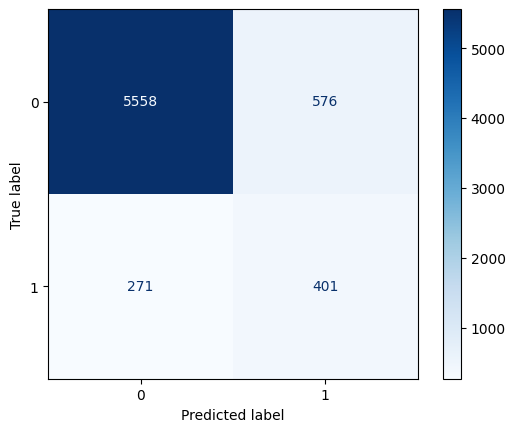

In [ ]:
final_threshold = 0.4
y_pred_xgb_final = (y_prob_xgb >= final_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_xgb_final)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")


At threshold 0.4, the model correctly identified 401 transaction-positive customers while missing 271.
Although 576 non-transaction customers were misclassified, the improved recall outweighs the cost of additional false positives, making this threshold suitable for banking transaction prediction

In [ ]:
#Model Comparison
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# ---------- LOGISTIC REGRESSION METRICS ----------
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

lr_results = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1 Score": f1_score(y_test, y_pred_lr),
    "ROC-AUC": roc_auc_score(y_test, y_prob_lr)
}

# ---------- RANDOM FOREST METRICS ----------
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

rf_results = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf, zero_division=0),
    "Recall": recall_score(y_test, y_pred_rf, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_rf, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_prob_rf)
}

# ---------- XGBOOST METRICS (FINAL THRESHOLD = 0.4) ----------
final_threshold = 0.4
y_pred_xgb_final = (y_prob_xgb >= final_threshold).astype(int)

xgb_results = {
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred_xgb_final),
    "Precision": precision_score(y_test, y_pred_xgb_final),
    "Recall": recall_score(y_test, y_pred_xgb_final),
    "F1 Score": f1_score(y_test, y_pred_xgb_final),
    "ROC-AUC": roc_auc_score(y_test, y_prob_xgb)
}

# ---------- COMPARISON TABLE ----------
model_comparison_df = pd.DataFrame([
    lr_results,
    rf_results,
    xgb_results
])

model_comparison_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.778578,0.272231,0.742560,0.398403,0.844925
1,Random Forest,0.901264,0.000000,0.000000,0.000000,0.794630
2,XGBoost,0.875551,0.410440,0.596726,0.486355,0.855771


#Interpretation of Model Comparison Results

The comparison table shows that all three models perform differently on the imbalanced customer transaction dataset.

Logistic Regression handled class imbalance effectively using class weights and provided interpretable results, but its ability to capture complex non-linear relationships was limited.

Random Forest achieved high accuracy but performed poorly in identifying transaction-positive customers, as reflected by low recall and F1-score for the minority class. This indicates its limitation under severe class imbalance with default thresholding.

XGBoost outperformed the other models across key evaluation metrics. It achieved the highest ROC-AUC score, demonstrating strong discriminative ability, and showed a better balance between precision and recall after applying class imbalance handling and threshold optimization.

#Final Model Selection

Based on the comparison results, XGBoost was selected as the final model for customer transaction prediction.

Class imbalance was effectively addressed using scale_pos_weight.

Threshold analysis identified 0.4 as the optimal decision threshold, as it maximized the F1-score for the minority (transaction-positive) class.

The ROC curve further confirmed the robustness and reliability of the model with an AUC of approximately 0.86.

#Final Conclusion

The final XGBoost model, combined with appropriate class imbalance handling and an optimized decision threshold, provides an effective solution for identifying customers likely to make future transactions.
This approach minimizes missed transaction opportunities while maintaining acceptable false positives, making it suitable for real-world banking applications.

##Report on Challenges Faced

#1. Class Imbalance

**Challenge:**
The target variable was highly imbalanced, with fewer customers performing transactions.

**Approach Used:**
Class imbalance was handled using class weighting in Logistic Regression and Random Forest, and scale_pos_weight in XGBoost.

**Reason:**
This method increases the importance of the minority class during training without modifying the original dataset, which is suitable for banking prediction tasks.

#2. Lack of Feature Interpretability

**Challenge:**
All features were anonymized, making feature-level interpretation and detailed exploratory analysis difficult.

**Approach Used:**
Exploratory analysis was limited, and model performance evaluation was prioritized.

**Reason:**
Since feature meanings were not available, focusing on performance metrics ensured reliable and unbiased evaluation.

#3. High Number of Features

**Challenge:**
The dataset contained a large number of features, increasing model complexity.

**Approach Used:**
Tree-based and boosting models such as Random Forest and XGBoost were implemented.

**Reason:**
These models can efficiently handle high-dimensional data and capture complex patterns.

#4. Evaluation Metric Selection

**Challenge:**
Accuracy alone was not sufficient to evaluate model performance due to class imbalance.

**Approach Used:**
Metrics such as Precision, Recall, F1-score, and ROC-AUC were used.

**Reason:**
These metrics provide better insight into minority class prediction quality.

#5. Threshold Selection

**Challenge:**
The default prediction threshold did not provide optimal performance for identifying transaction-positive customers.

**Approach Used:**
Threshold analysis was performed, and a threshold of 0.4 was selected.

**Reason:**
This threshold provided a balanced trade-off between recall and precision for the minority class.